In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
def Z(mu, sigma):
    return(norm.cdf(mu/sigma))

def M1(mu, sigma):
    return(1/Z(mu, sigma))

def AR_Norm_Simple(mu, sigma):
    X = -1
    M = M1(mu, sigma)
    while(X == -1):
        Y = mu+sigma*norm.rvs()
        if(Y > 0):
            X = Y
    return(X) 

def params(i, mu, Q, X):
    mu_x = mu[i]-np.sum([Q[i,j]*(X[j]-mu[j]) for j in range(len(mu)) if j != i])/Q[i,i]
    sigma_squared_x = 1/Q[i,i]
    return(mu_x, sigma_squared_x)

def Gibbs_Sampler(n, mu, Sigma, X0):
    d = len(mu)
    Q = np.linalg.inv(Sigma)
    X = [list(X0)]
    for _n in range(n):
        for i in range(d):
            mu_x, s_s_x = params(i, mu, Q, X0)
            X0[i] = AR_Norm_Simple(mu_x, np.sqrt(s_s_x))
        X.append(list(X0))
    return(np.array(X))

In [70]:
def plot_Gibbs(X, mu, Sigma):
    d = len(mu)
    fig, axs = plt.subplots(d, figsize = (10,15))
    x = np.linspace(0, 50, 10000)
    for t in range(d):
        y = norm.pdf(x, loc = mu[t], scale = np.sqrt(Sigma[t,t]))/Z(mu[t], np.sqrt(Sigma[t,t]))
        axs[t].hist(X[5000:,t], density = True, bins = 40, label = "Histogramme des simulations")
        axs[t].plot(x, y, label = "Densité théorique")
    fig.suptitle('Densités théoriques et pratiques', y = 0.9)

In [4]:
n = 10000
mu = np.array([0,0,10])
Sigma = np.array([[2,1,1],
                  [1,3,1],
                  [1,1,4]])
X0 = expon.rvs(size = 3)
X = Gibbs_Sampler(n, mu, Sigma, X0)

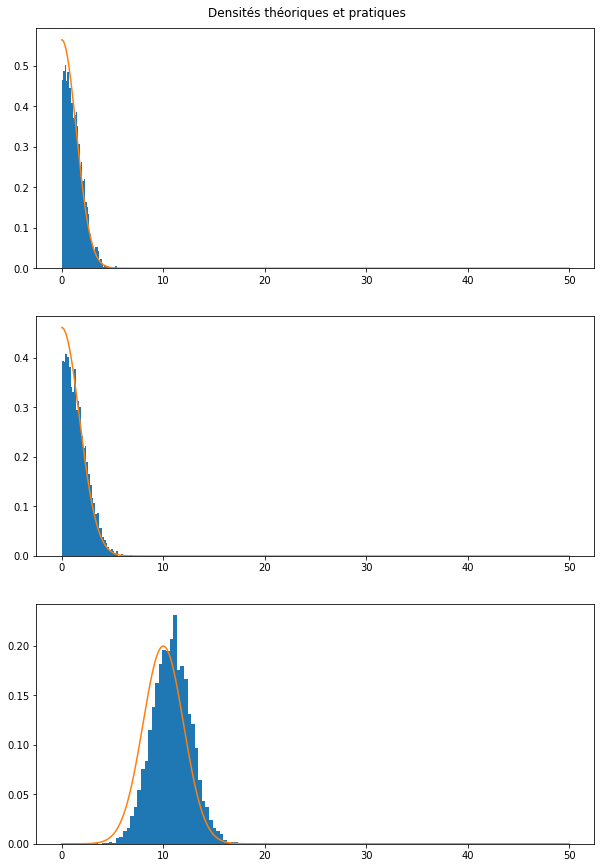

In [71]:
plot_Gibbs(X, mu, Sigma)

In [6]:
def autocorr(X, t):
    X_t = np.transpose(X)
    if(t == 0):
        return(np.corrcoef(X_t[:,:],X_t[:,:]))
    return(np.corrcoef(X_t[:,t:],X_t[:,:-t]))

In [72]:
def graph_autocorr(X, t = 50):
    Lags = [_n for _n in range(t+1)]
    d = X.shape[1]
    fig, axs = plt.subplots(d, figsize = (10,15))
    for _d in range(d):
        Auto = [autocorr(X, lag)[_d,_d+3] for lag in Lags]
        axs[_d].plot([-int(t/50),t+int(t/50)],[0,0], color = 'black')
        axs[_d].plot([-int(t/50),t+int(t/50)],[0.2,0.2], color = 'blue', linestyle='dashed')
        axs[_d].plot([-int(t/50),t+int(t/50)],[-0.2,-0.2], color = 'blue', linestyle='dashed')
        for i in range(len(Auto)):
            axs[_d].plot([Lags[i], Lags[i]], [0, Auto[i]], color = 'black')
        axs[_d].axis([-int(t/50),t+int(t/50),min(Auto)-0.1,max(Auto)+0.1])
    fig.suptitle('Graphes des autocorrélations', y = 0.9)

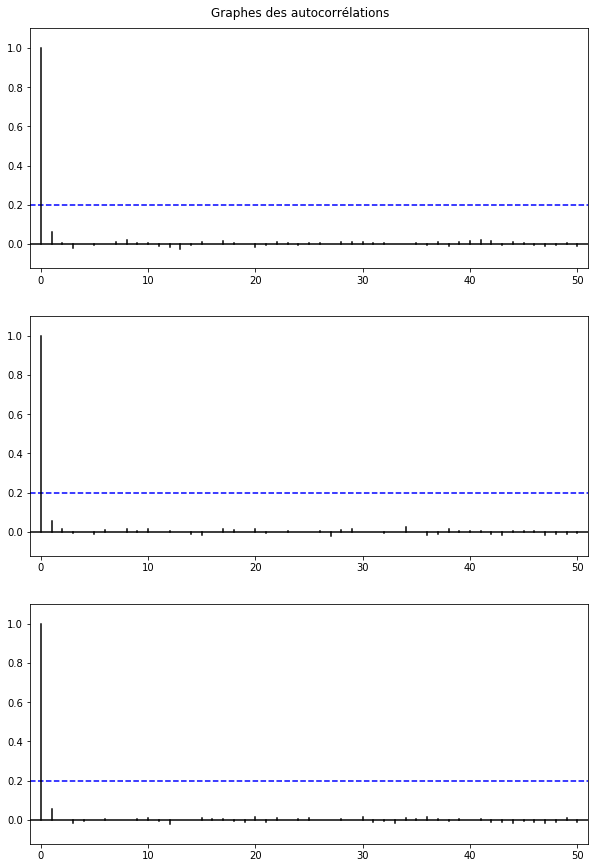

In [73]:
graph_autocorr(X)